In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-03-20 17:05:29,169 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:b1:6a:38:3C
2023-03-20 17:05:32,571 | INFO     |: Connected to C0:83:b1:6a:38:3C


D:\Workspace\ECE-5160-Sp23\ble_robot-1.1\ble_python\base_ble.py:87: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [3]:
def get_data_cb(uuid, byte_array):
    global tof_list, pwm_list
    if byte_array is not None:
        s = byte_array.decode("utf-8")
        s = s.split("|")  # split each reading
        
        if s[0] == 'T':
            # TOF
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                tof  = int(data[1])
                if tof > 0:
                    tof_time_list.append(time)
                    tof_data_list.append(tof)
        else:
            # PWM
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                pwm  = int(data[1])
                if pwm > 0:
                    pwm_time_list.append(time)
                    pwm_data_list.append(pwm)

In [4]:
ble.start_notify(ble.uuid['RX_STRING'], get_data_cb)

In [5]:
tof_data_list = []
pwm_data_list = []
tof_time_list = []
pwm_time_list = []


In [6]:
# start
ble.send_command(CMD.SEND_TWO_INTS, "")

In [7]:
# stop
ble.send_command(CMD.SEND_THREE_FLOATS, "")

In [8]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [9]:
tof_time_list = [x - tof_time_list[0] for x in tof_time_list]
pwm_time_list = [x - pwm_time_list[0] for x in pwm_time_list]

In [10]:
print(tof_data_list)
print(tof_time_list)

[1891, 1863, 1845, 1832, 1800, 1781, 1736, 1692, 1647, 1590, 1536, 1464, 1405, 1330, 1262, 1182, 1107, 1033, 960, 898, 823, 760, 698, 635, 569, 508, 455, 410, 382, 364, 357, 356, 354, 350, 350, 347, 344, 342, 339, 336, 330, 325, 322, 316, 309, 300, 295, 288, 283, 278, 275, 274, 270, 274, 272, 272, 272, 272, 271, 273, 271, 271, 271, 272, 272, 271, 271, 272, 271, 271, 272, 272, 273, 272, 271, 272, 272, 273]
[0, 60, 122, 190, 254, 318, 378, 442, 502, 563, 625, 684, 745, 805, 867, 938, 1001, 1062, 1122, 1186, 1244, 1307, 1367, 1430, 1501, 1566, 1630, 1692, 1758, 1823, 1889, 1962, 2029, 2093, 2154, 2217, 2277, 2337, 2402, 2473, 2536, 2600, 2662, 2722, 2791, 2860, 2917, 2976, 3036, 3108, 3175, 3240, 3303, 3370, 3435, 3497, 3557, 3617, 3678, 3748, 3811, 3870, 3933, 3998, 4055, 4114, 4179, 4242, 4303, 4365, 4437, 4497, 4557, 4622, 4683, 4748, 4810, 4870]


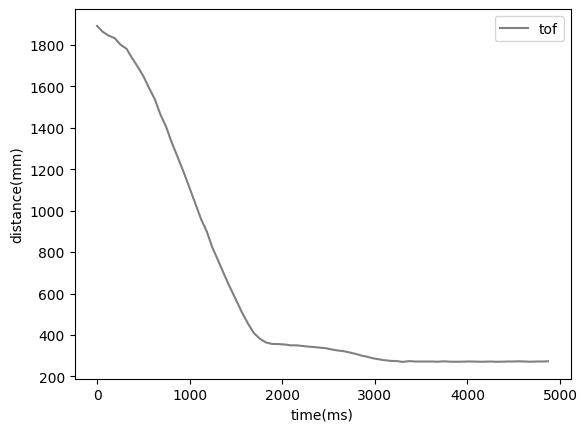

In [11]:
plt.plot(tof_time_list, tof_data_list, color='gray', label='tof')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('distance(mm)')
plt.show()

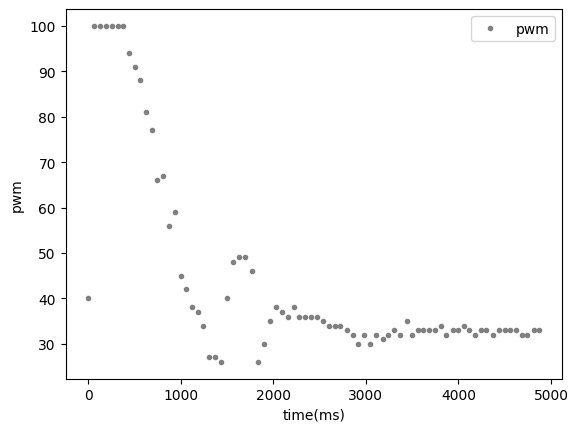

2023-03-20 17:06:20,635 | INFO     |: Disconnected from C0:83:b1:6a:38:3C


In [12]:
plt.plot(pwm_time_list, pwm_data_list, '.', color='gray', label='pwm')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('pwm')
plt.show()

In [ ]:
# Disconnect
ble.disconnect()